<a href="https://colab.research.google.com/github/vifirsanova/empi/blob/main/KB/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вывод подграфа

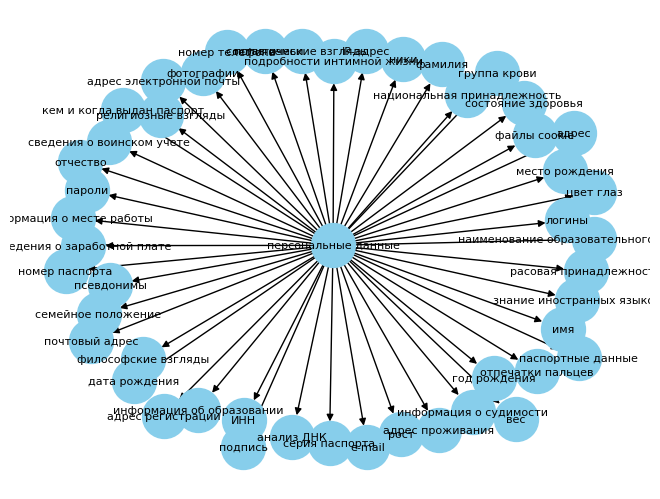

In [ ]:
def draw_subgraph(graph, start_node, max_depth):
    subgraph = nx.bfs_tree(graph, source=start_node, depth_limit=max_depth)
    pos = nx.spring_layout(subgraph)
    labels = nx.get_edge_attributes(subgraph, 'label')
    nx.draw(subgraph, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=8)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)
    plt.show()

draw_subgraph(graph, start_node='персональные данные', max_depth=1)

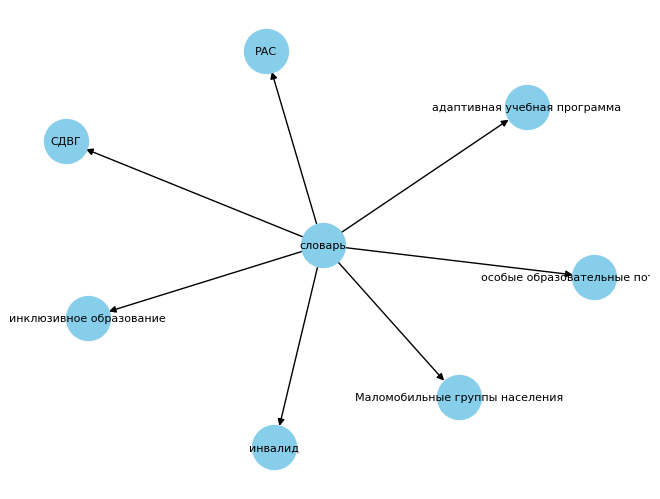

In [ ]:
def draw_subgraph(graph, start_node, max_depth):
    subgraph = nx.bfs_tree(graph, source=start_node, depth_limit=max_depth)
    pos = nx.spring_layout(subgraph)
    labels = nx.get_edge_attributes(subgraph, 'label')
    nx.draw(subgraph, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=8)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)
    plt.show()

draw_subgraph(graph, start_node='словарь', max_depth=1)

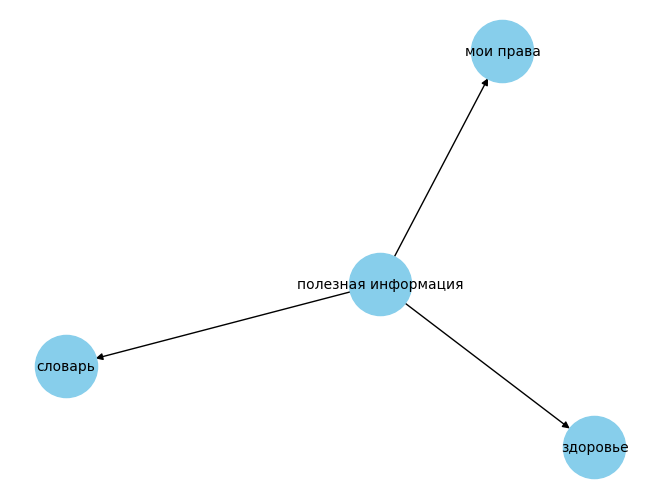

In [ ]:
def draw_subgraph(graph, start_node, max_depth):
    subgraph = nx.bfs_tree(graph, source=start_node, depth_limit=max_depth)
    pos = nx.spring_layout(subgraph)
    labels = nx.get_edge_attributes(subgraph, 'label')
    nx.draw(subgraph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)
    plt.show()

draw_subgraph(graph, start_node='полезная информация', max_depth=1)

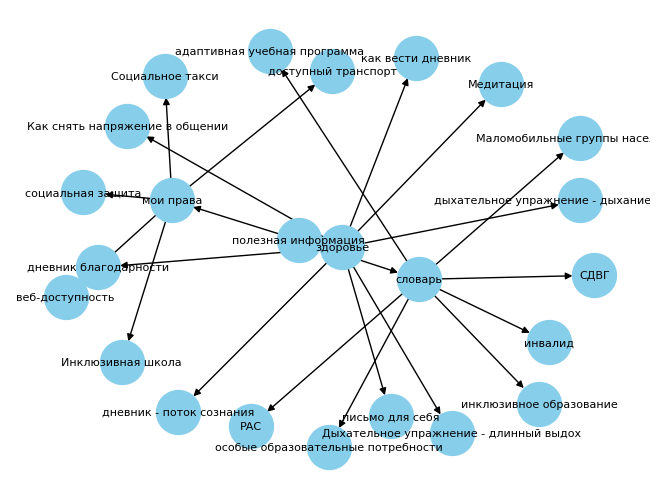

In [ ]:
def draw_subgraph(graph, start_node, max_depth):
    subgraph = nx.bfs_tree(graph, source=start_node, depth_limit=max_depth)
    pos = nx.spring_layout(subgraph)
    labels = nx.get_edge_attributes(subgraph, 'label')
    nx.draw(subgraph, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=8)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)
    plt.show()

draw_subgraph(graph, start_node='полезная информация', max_depth=2)

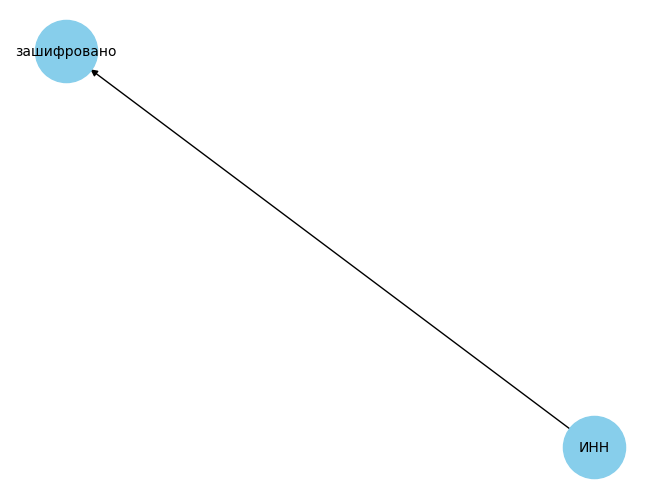

In [ ]:
def draw_subgraph(graph, start_node, max_depth):
    subgraph = nx.bfs_tree(graph, source=start_node, depth_limit=max_depth)
    pos = nx.spring_layout(subgraph)
    labels = nx.get_edge_attributes(subgraph, 'label')
    nx.draw(subgraph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)
    plt.show()

draw_subgraph(graph, start_node='ИНН', max_depth=1)

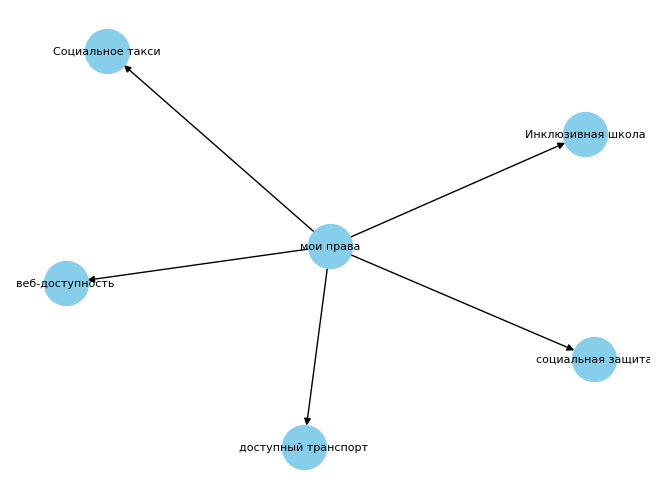

In [ ]:
def draw_subgraph(graph, start_node, max_depth):
    subgraph = nx.bfs_tree(graph, source=start_node, depth_limit=max_depth)
    pos = nx.spring_layout(subgraph)
    labels = nx.get_edge_attributes(subgraph, 'label')
    nx.draw(subgraph, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=8)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels)
    plt.show()

draw_subgraph(graph, start_node='мои права', max_depth=1)

Образец информационного текста из базы знаний

In [ ]:
json_data['empi']['полезная информация']['мои права']['Инклюзивная школа']

'В инклюзивной школе все ребята, включая тех, у кого есть специальные потребности или инвалидность, получают образование на равных.'

Создание матрицы технологий EMPI

In [ ]:
import pandas as pd
df = pd.DataFrame(json_data['empi']['дизайн']).transpose()
df.to_csv('data.csv', index=False)
df

,технология,принцип работы,для кого
диктовка,speech-to-text,распознавание речи,"[нарушения слуха, после травм, физические огра..."
чтение вслух,text-to-speech,озвучивание текста,"[нарушения зрения, РАС, когнитивные нарушения,..."
cкринридер,text-to-speech,"программа чтения с экрана, например, VoiceOver...","[нарушения зрения, дислексия, когнитивные нару..."
cинтезатор речи,text-to-speech,технология автоматического воспроизведения тек...,"[РАС, афазия, нарушения процесса порождения речи]"
субтитры,speech-to-text,создание автоматических подписей-расшифровок к...,"[нарушения слуха, носители иностранного языка,..."
структурированный контент,HTML,С помощью разметки HTML контент на веб-страниц...,"[когнитивные нарушения, РАС]"
альтернативные подписи к изображениям,HTML,С помощью разметки HTML все изображения подпис...,[нарушения зрения]
повышеная контрастность,CSS,"Высокий контраст между текстом и фоном, возмож...","[нарушения зрения, когнитивные нарушения]"
адаптивный дизайн,CSS,Адаптация веб-дизайна под экраны разных размер...,[разные устройства]


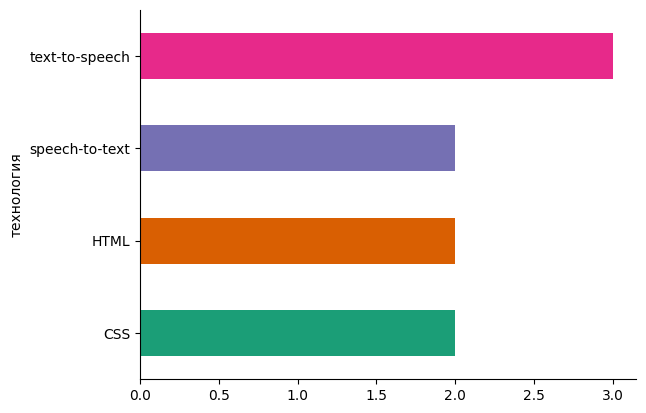

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('технология').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Результат: универсальный граф знаний для разработки.

Что хранится в базе знаний?
- типы пользовательских данных для шифрования
- основные технологии для разработки системы EMPI
- информационные тексты для наполнения контента